In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np 

%reload_ext autoreload
%aimport fluid_flow
from fluid_flow import produce_final_data, compute_UVP
from pathlib import Path

In [2]:
#compute_UVP(30);

In [10]:
#%autoreload 1
N_list = np.array([30,50,70,100,130, 160, 200,250])
N_list = np.array([70])

if True:
    chrono = produce_final_data(N_list)
    
    from pathlib import Path
    p = Path('data/vel_field') / 'UVP_CPU_time_2.npy'
    #np.save(p, [N_list, chrono])

working on 70
10
5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
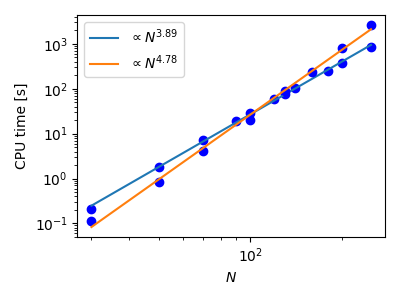

In [11]:
fig, ax = plt.subplots(figsize=(4,3))

ps = [Path('data/vel_field') / 'UVP_CPU_time{}.npy'.format(s) for s in ['', '_2']]
      
for p in ps:
    N_list, chrono = np.load(p)

    ax.plot(N_list, chrono, 'bo')
    ax.set_xscale('log')
    ax.set_yscale('log')
    from scipy.optimize import curve_fit
    def lin(x, a, b): return a*x + b 
    popt, pcov = curve_fit(lin, np.log(N_list), np.log(chrono))
    a,b = popt
    yopt = np.exp(b)*(N_list)**a
    if False:
        ax.text(0.9, 0.2, '$\delta \propto N^{' + '{:.2f}'.format(a) + '}$', 
                transform=ax.transAxes, horizontalalignment='right', verticalalignment='bottom',
                fontsize='x-large')
    s = '$\propto N^{' + '{:.2f}'.format(a) + '}$'
    ax.plot(N_list, yopt, label=s)
ax.set_xlabel('$N$')
ax.set_ylabel('CPU time [s]')
ax.legend()
plt.tight_layout()

In [6]:
print('total time needed [min]:', chrono.sum() / 60)

total time needed [min]: 63.19419091939926
